In [1]:
%matplotlib inline
import os,sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import root_numpy as rn
import ROOT

Welcome to JupyROOT 6.18/00


In [2]:
#import .root file
df_maj = pd.DataFrame(rn.root2array("/Users/simontsui/python_code/DLLEE/mcc9jan_extbnb_wpmtcut.root"))
#df_pmt = pd.DataFrame(rn.root2array("/Users/simontsui/python_code/DLLEE/mcc9jan_pmtpe.root"))
df_lpe = pd.DataFrame(rn.root2array("/Users/simontsui/python_code/DLLEE/FinalVertexVariables_mcc9_extbnb_lpe.root"))
#df_lopmt = pd.DataFrame(rn.root2array("/Users/simontsui/python_code/DLLEE/mcc9_extbnb_optfail_pmtdump.root"))

In [9]:
#Compare two EXT distributions
#lo,hi = lower and upper limit of x-axis
#stp = number of bins
def CompareDistribution(df1, df2, parameter, lo, hi, stp):  
    val_df1 = df1.loc[df1['PassCuts'] > 0][parameter]
    val_df2 = df2.loc[df2['PassCuts'] > 0][parameter]
    bins = np.linspace(lo,hi,stp)
    
    norm_factor = len(val_df1) / len(val_df2)
    weights = norm_factor * np.ones(len(val_df2))
    
    data_x1 = bins[:-1] + np.diff(bins)/2.0
    data_y1 = np.histogram(val_df1.values,bins=bins)[0]
    err_x1 = np.diff(bins)/2.0
    err_y1 = np.where(data_y1==0,1.0,np.sqrt(data_y1))
    
    data_x2 = bins[:-1] + np.diff(bins)/2.0
    data_y2 = norm_factor * np.histogram(val_df2.values,bins=bins)[0]
    err_x2 = np.diff(bins)/2.0
    err_y2 = np.where(data_y2==0,1.0,np.sqrt(data_y2))
    
    #print(np.mean((data_y1 - data_y2)**2 / np.sqrt(err_y1**2 + err_y2**2)))
    _,p_val = ks_2samp(data_y1, data_y2); p_value = round(p_val,5)
    
    plt.hist(val_df1, bins=bins,linewidth=2,alpha = 0.5,label='PE > 20') 
    plt.errorbar(data_x1,data_y1,xerr=err_x1,yerr=err_y1,fmt='o',color='black')
    
    plt.hist(val_df2, bins=bins,weights=weights,linewidth=2,alpha = 0.5,density=0,label='PE > 5')
    plt.errorbar(data_x2,data_y2,xerr=err_x2,yerr=err_y2,fmt='o',color='black')
    
    plt.xlabel(parameter)
    plt.ylabel('Event Count')
    plt.title(parameter)
    plt.grid(linestyle='--')
    plt.text(data_x1[0], 1.35*max(data_y2),'p-value by KS: ' + str(p_value),fontsize=14)
    plt.legend()

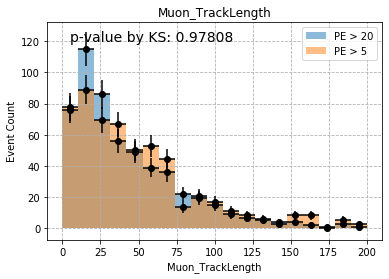

In [10]:
CompareDistribution(df_maj,df_lpe, 'Muon_TrackLength',0,200,20)